# APPLE STOCK PREDICTION   (01/22-02/24)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('stock_apple.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-06-25,22.552500,22.674999,22.412500,22.590000,19.981649,147476000
1,2014-06-26,22.592501,22.762501,22.450001,22.725000,20.101065,130516000
2,2014-06-27,22.705000,23.000000,22.692499,22.995001,20.339888,256116000
3,2014-06-30,23.025000,23.432501,23.022499,23.232500,20.549961,197929200
4,2014-07-01,23.379999,23.517500,23.282499,23.379999,20.680437,152892000
...,...,...,...,...,...,...,...
2511,2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
2512,2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300
2513,2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500
2514,2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,246421400


In [3]:
df.shape

(2516, 7)

In [4]:
df.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2516 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.7+ KB


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

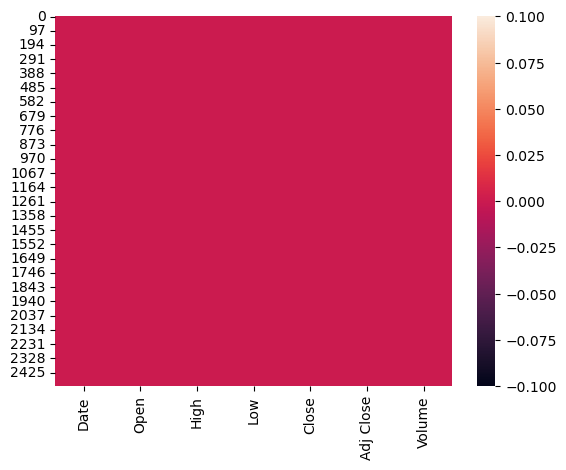

In [7]:
sns.heatmap(df.isna())

In [8]:
df['Volume'].unique()

array([147476000, 130516000, 256116000, ...,  86172500, 246421400,
        80629700], dtype=int64)

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Date
2014-06-25    1
2021-03-01    1
2021-02-18    1
2021-02-19    1
2021-02-22    1
             ..
2017-10-20    1
2017-10-23    1
2017-10-24    1
2017-10-25    1
2024-06-24    1
Name: count, Length: 2516, dtype: int64


Open
127.820000    3
142.699997    3
39.375000     3
181.270004    3
24.000000     3
             ..
43.720001     1
43.407501     1
43.125000     1
43.037498     1
207.720001    1
Name: count, Length: 2367, dtype: int64


High
24.469999     3
43.750000     3
40.000000     3
29.360001     3
151.570007    3
             ..
43.637501     1
43.075001     1
42.647499     1
42.962502     1
212.699997    1
Name: count, Length: 2361, dtype: int64


Low
133.770004    3
24.577499     3
142.649994    3
23.525000     3
147.679993    3
             ..
43.622501     1
43.250000     1
43.352501     1
43.482498     1
206.589996    1
Name: count, Length: 2382, dtype: int64


Close
31.650000     3
175.839996    3
24.905001     3
163.759995    3
24.334999     3
             ..
41.8574

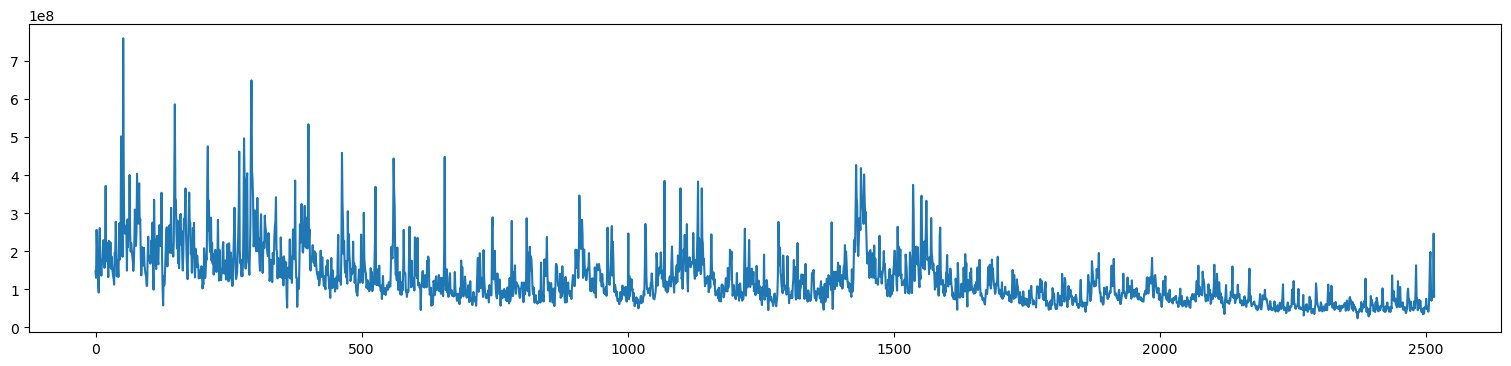

In [10]:
plt.figure(figsize=(19,4))
plt.plot(df['Volume'])
plt.show()

In [11]:
print("mim volume",df.Volume.min())
print('max volume',df.Volume.max())

mim volume 24048300
max volume 759385200


In [12]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
# conerting date into date month and year format because of it is object
df['Date'] = pd.to_datetime(df["Date"],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2516 non-null   datetime64[ns]
 1   Open       2516 non-null   float64       
 2   High       2516 non-null   float64       
 3   Low        2516 non-null   float64       
 4   Close      2516 non-null   float64       
 5   Adj Close  2516 non-null   float64       
 6   Volume     2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.7 KB


In [14]:
df.set_index('Date',inplace=True)

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-25,22.552500,22.674999,22.412500,22.590000,19.981649,147476000
2014-06-26,22.592501,22.762501,22.450001,22.725000,20.101065,130516000
2014-06-27,22.705000,23.000000,22.692499,22.995001,20.339888,256116000
2014-06-30,23.025000,23.432501,23.022499,23.232500,20.549961,197929200
2014-07-01,23.379999,23.517500,23.282499,23.379999,20.680437,152892000
...,...,...,...,...,...,...
2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500


In [16]:
df.drop('Adj Close',axis=1,inplace=True)

In [17]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-06-25,22.552500,22.674999,22.412500,22.590000,147476000
2014-06-26,22.592501,22.762501,22.450001,22.725000,130516000
2014-06-27,22.705000,23.000000,22.692499,22.995001,256116000
2014-06-30,23.025000,23.432501,23.022499,23.232500,197929200
2014-07-01,23.379999,23.517500,23.282499,23.379999,152892000


In [18]:
df.duplicated().sum()

0

In [19]:
df.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,85.637794,86.559616,84.775963,85.704435,1.255048e+08
std,58.918572,59.561189,58.331195,58.968956,7.185762e+07
min,22.500000,22.674999,22.367500,22.584999,2.404830e+07
25%,32.236251,32.511876,32.049377,32.214375,7.646560e+07
50%,53.518752,54.209999,52.913752,53.436251,1.062371e+08
75%,145.169998,146.997501,143.719998,145.554996,1.538043e+08
max,217.589996,220.199997,213.000000,216.669998,7.593852e+08


# Good representation of heatmap

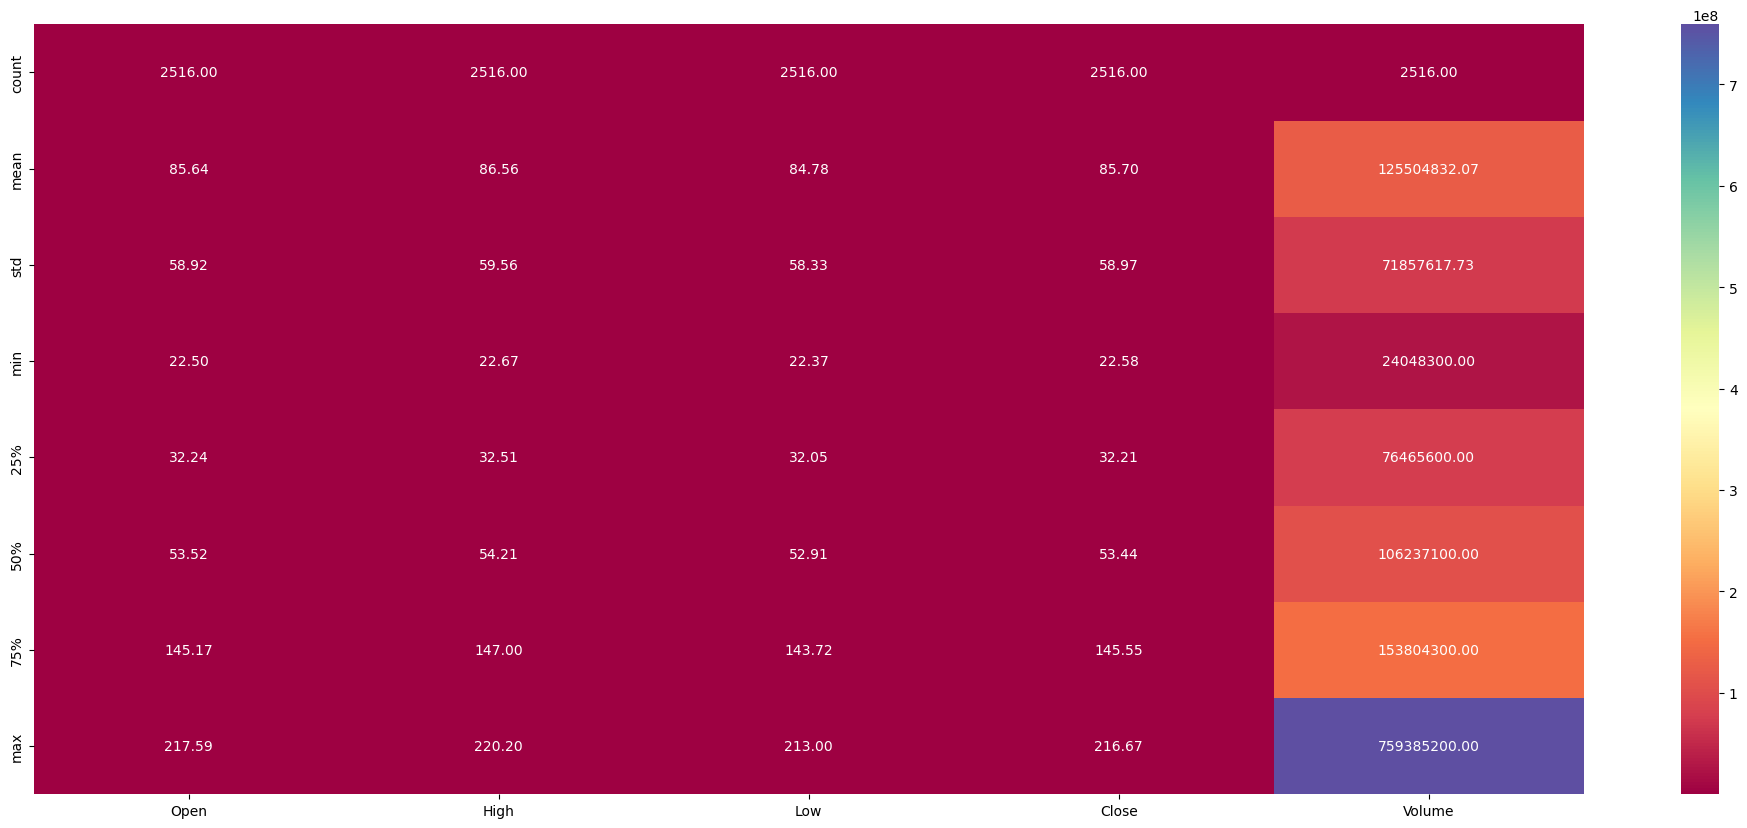

In [20]:
# heatmap of describe 
plt.figure(figsize=(25,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',cmap='Spectral')
plt.show()

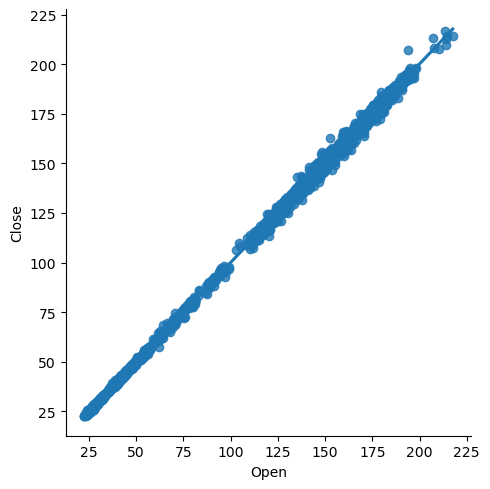

In [21]:
# data visualization
sns.lmplot(x='Open',y='Close',data=df,palette='colorblind')
plt.show()

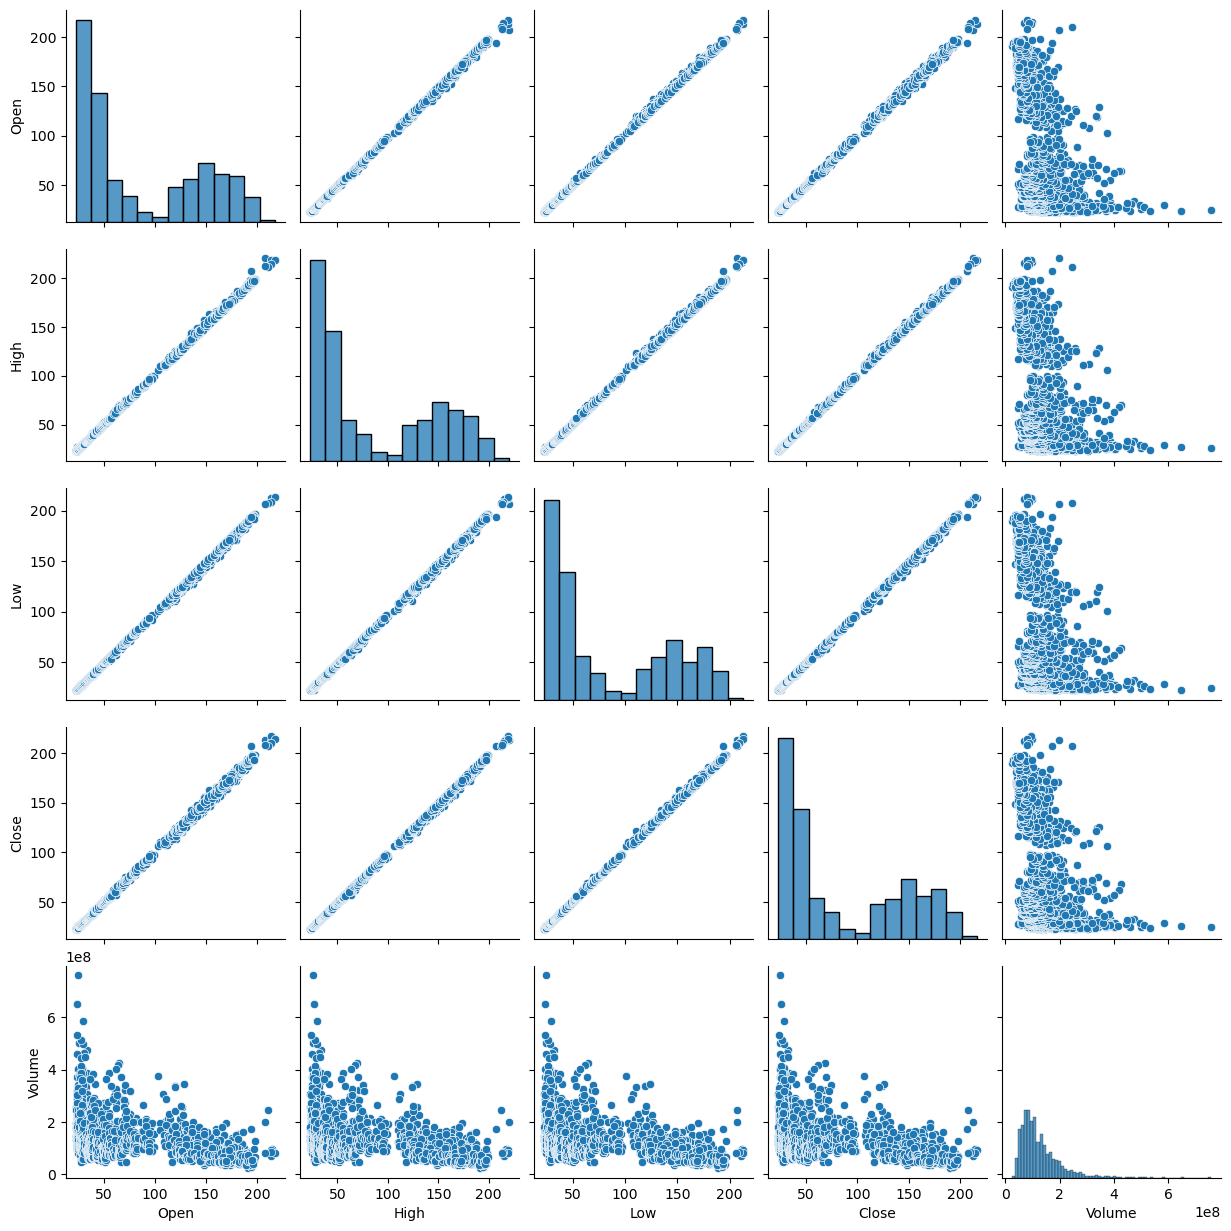

In [22]:
sns.pairplot(data=df,palette='Flare')

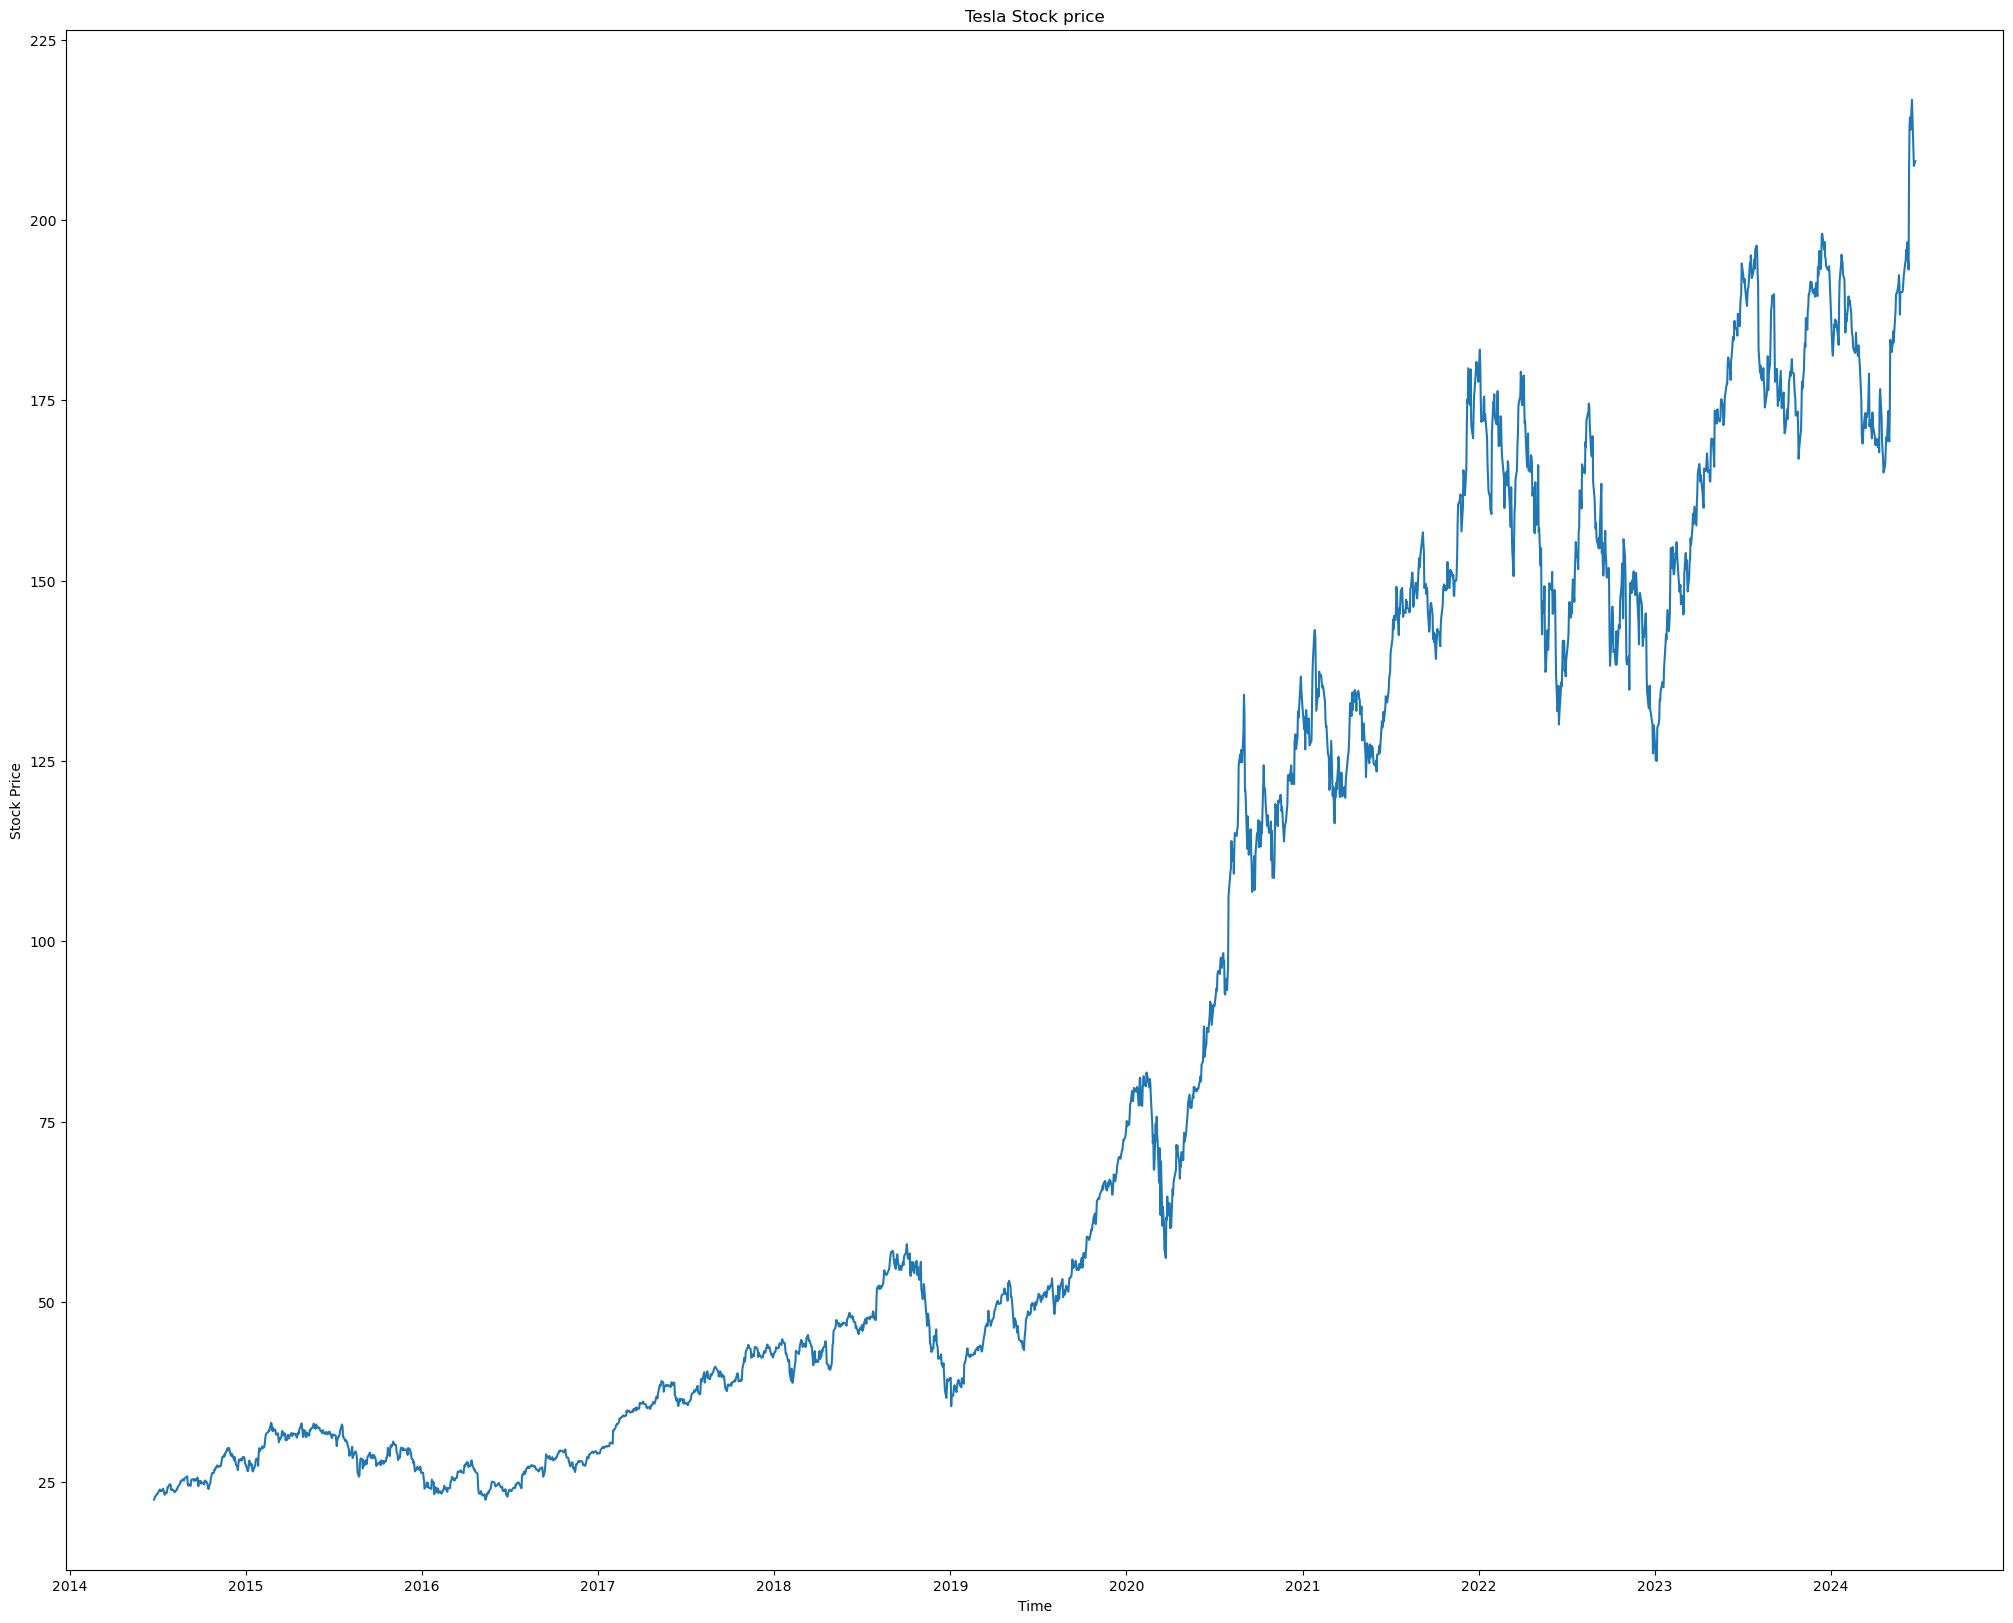

In [23]:
plt.figure(figsize=(25,20))
plt.plot(df.Close,label= 'Closing Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Tesla Stock price')
plt.show()

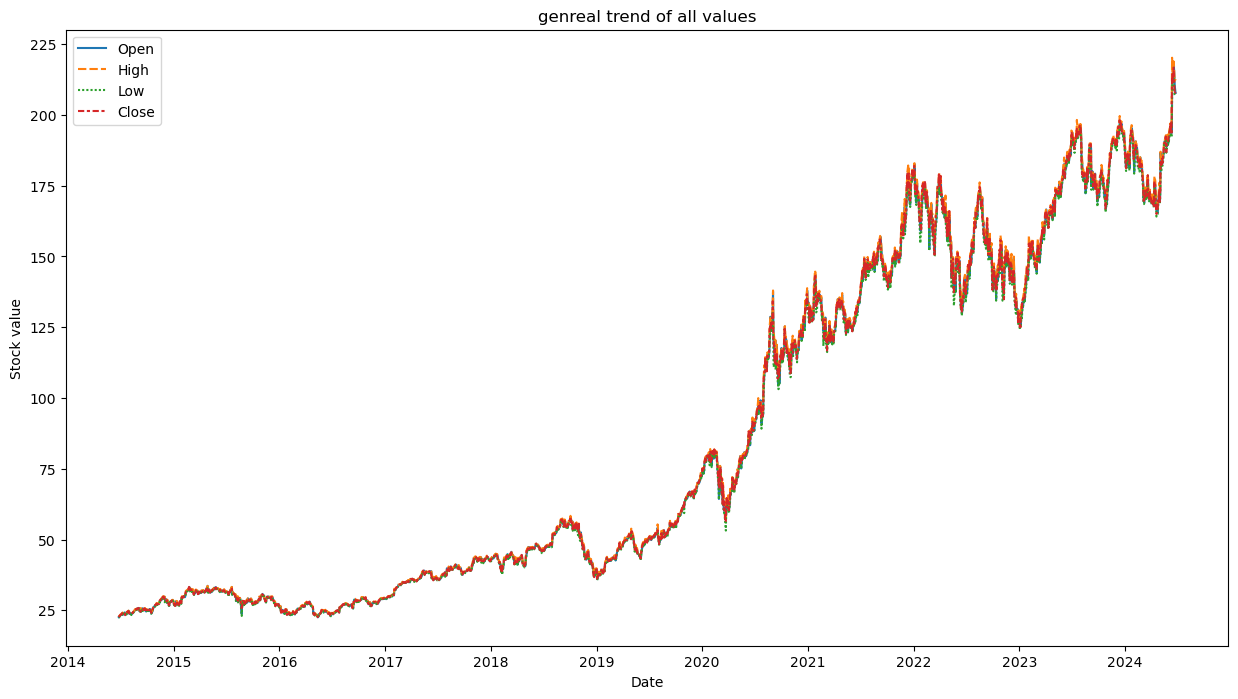

In [24]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.legend()
plt.ylabel("Stock value")
plt.title('genreal trend of all values')
plt.show()

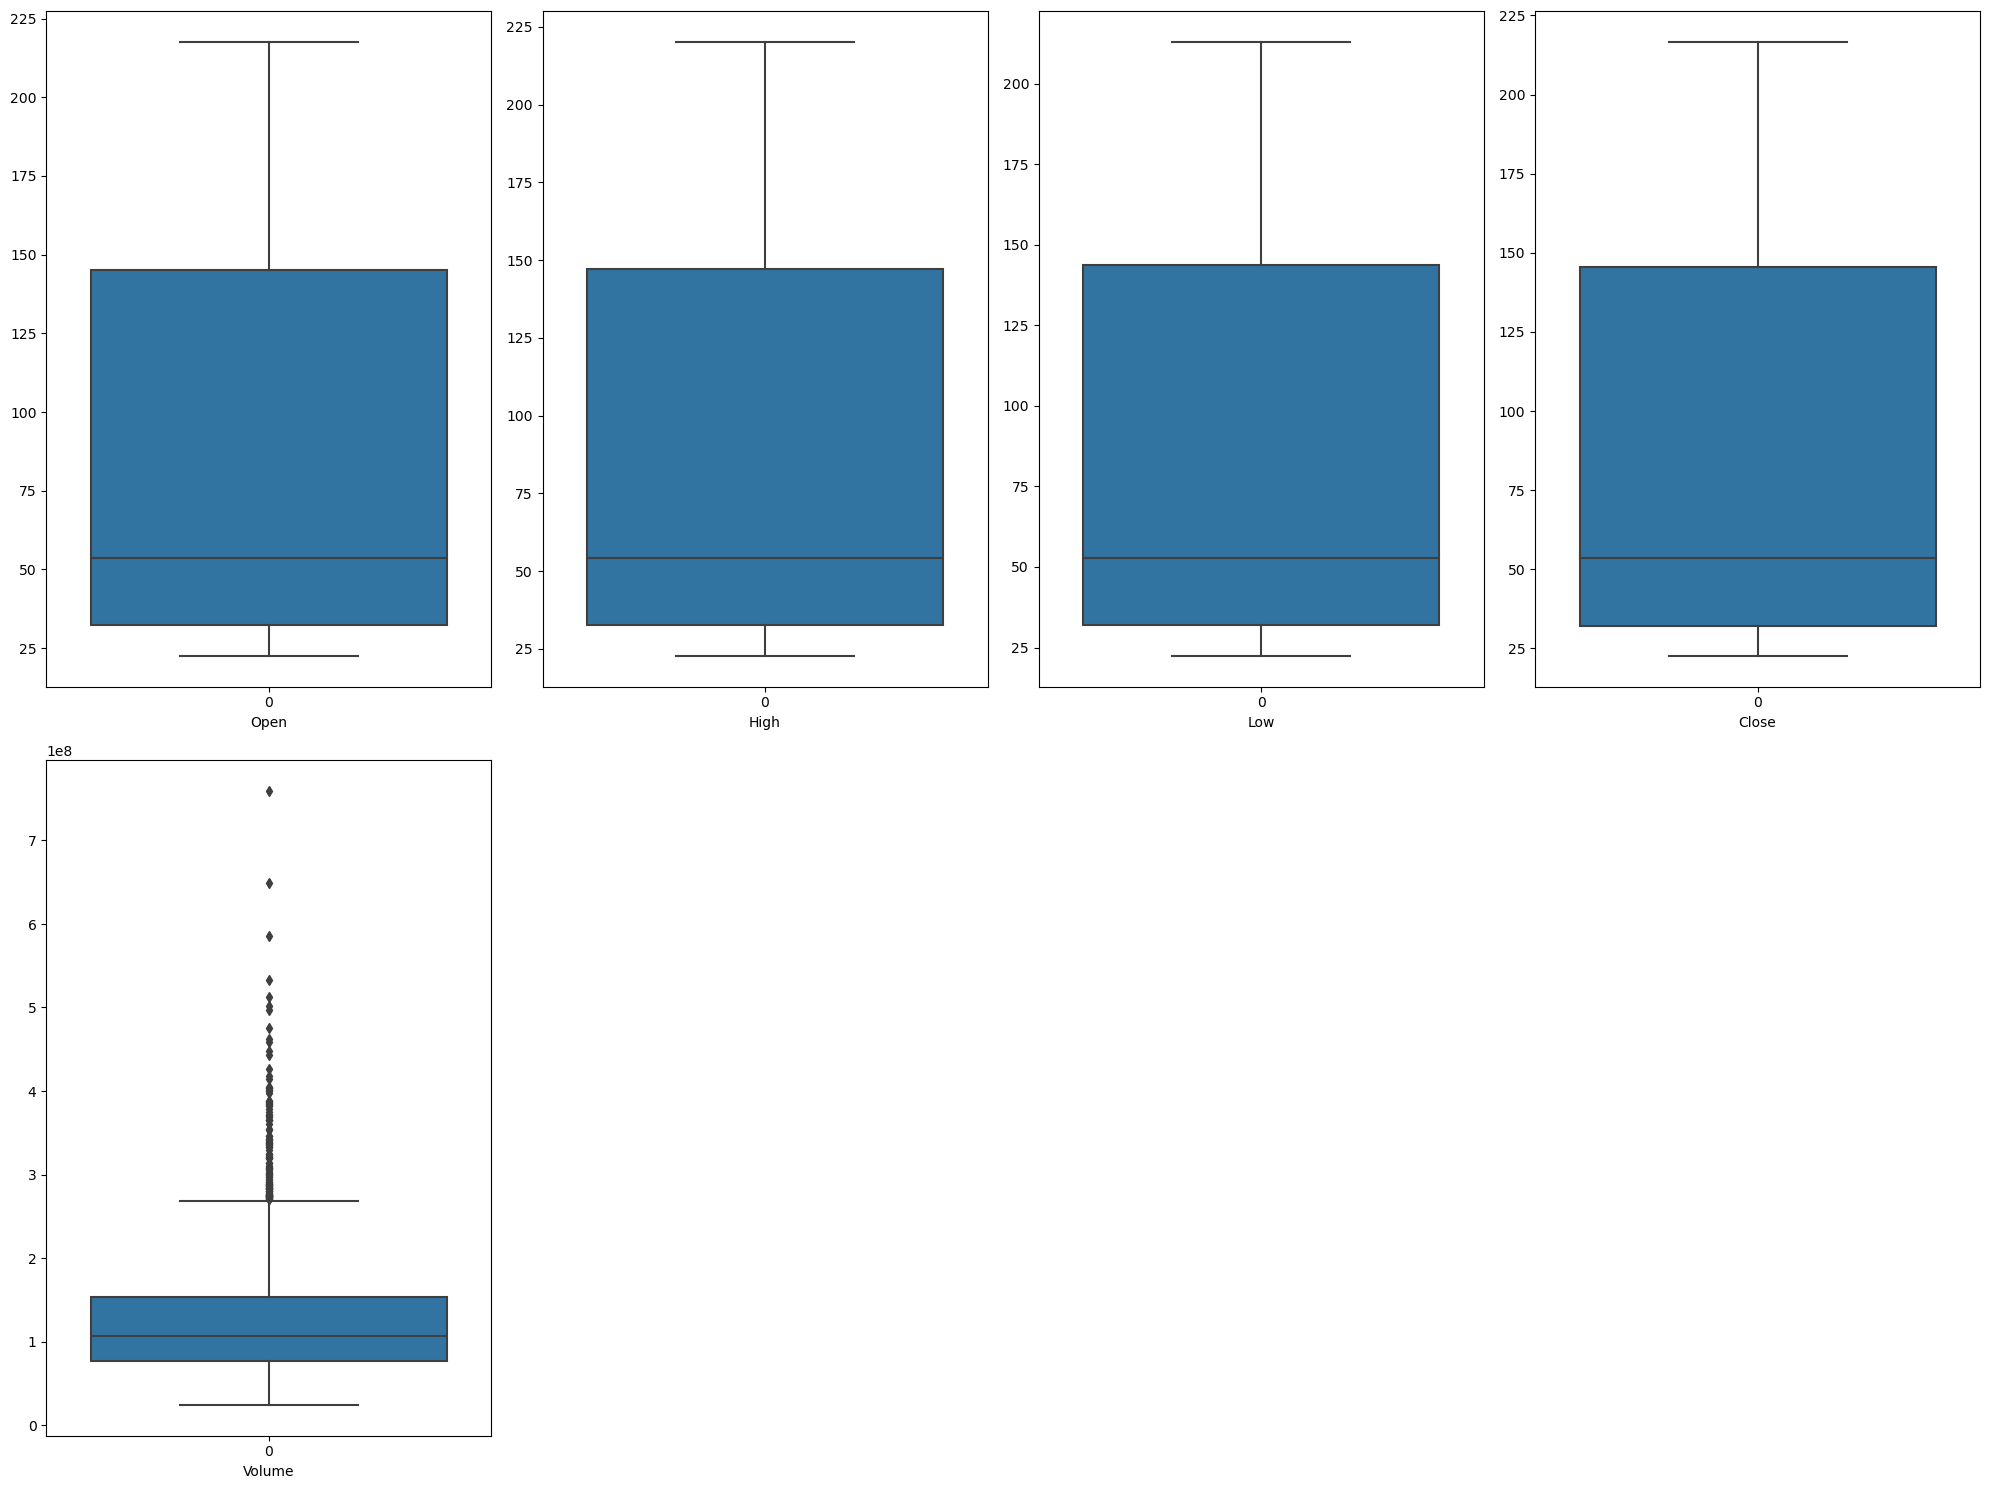

In [25]:
# Outlier 
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
    if plotnumber<=6:
        ax= plt.subplot(2,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

In [26]:
# removing outlier by using IQR technique before building the model 
# z = (x – μ)/ σ
# x: is the test value
# μ: is the mean
# σ: is the standard value

from scipy.stats import zscore
out_features = df[['Open','High','Low','Volume']]
z = np.abs(zscore(out_features))
z

,Open,High,Low,Volume
Date,,,,
2014-06-25,1.070933,1.072801,1.069340,0.305821
2014-06-26,1.070254,1.071332,1.068697,0.069751
2014-06-27,1.068344,1.067344,1.064539,1.818000
2014-06-30,1.062912,1.060081,1.058880,1.008087
2014-07-01,1.056885,1.058653,1.054422,0.381207
...,...,...,...,...
2024-06-17,2.168376,2.223204,2.193843,0.442303
2024-06-18,2.240014,2.217831,2.198644,0.634179
2024-06-20,2.177882,2.144110,2.127484,0.547474


In [27]:
# threshold 
# 'above output shows e.g 520 column and 3rd value is above threshold value
np.where(z>3)

(array([  19,   48,   49,   52,   53,   64,   78,   82,  124,  148,  149,
         169,  176,  210,  211,  270,  279,  280,  284,  285,  292,  293,
         294,  295,  339,  375,  400,  463,  526,  560,  561,  656,  909,
        1069, 1099, 1132, 1139, 1429, 1430, 1438, 1439, 1444, 1536, 1552],
       dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       dtype=int64))

In [28]:
# finding the z value 
z.iloc[520,3]

0.42293737582658203

In [29]:
# Now removing the data above Zscore and creating new df

df1 = df[(z<3).all(axis=1)]
df1.shape

(2472, 5)

In [30]:
# finding data loss percentage after zscore 
print('Data loss percentage ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

# data loss percentage not exced above 10% if it exced use iqr technique

Data loss percentage  1.7488076311605723


In [31]:
df1

,Open,High,Low,Close,Volume
Date,,,,,
2014-06-25,22.552500,22.674999,22.412500,22.590000,147476000
2014-06-26,22.592501,22.762501,22.450001,22.725000,130516000
2014-06-27,22.705000,23.000000,22.692499,22.995001,256116000
2014-06-30,23.025000,23.432501,23.022499,23.232500,197929200
2014-07-01,23.379999,23.517500,23.282499,23.379999,152892000
...,...,...,...,...,...
2024-06-17,213.369995,218.949997,212.720001,216.669998,93728300
2024-06-18,217.589996,218.630005,213.000000,214.289993,79943300
2024-06-20,213.929993,214.240005,208.850006,209.679993,86172500


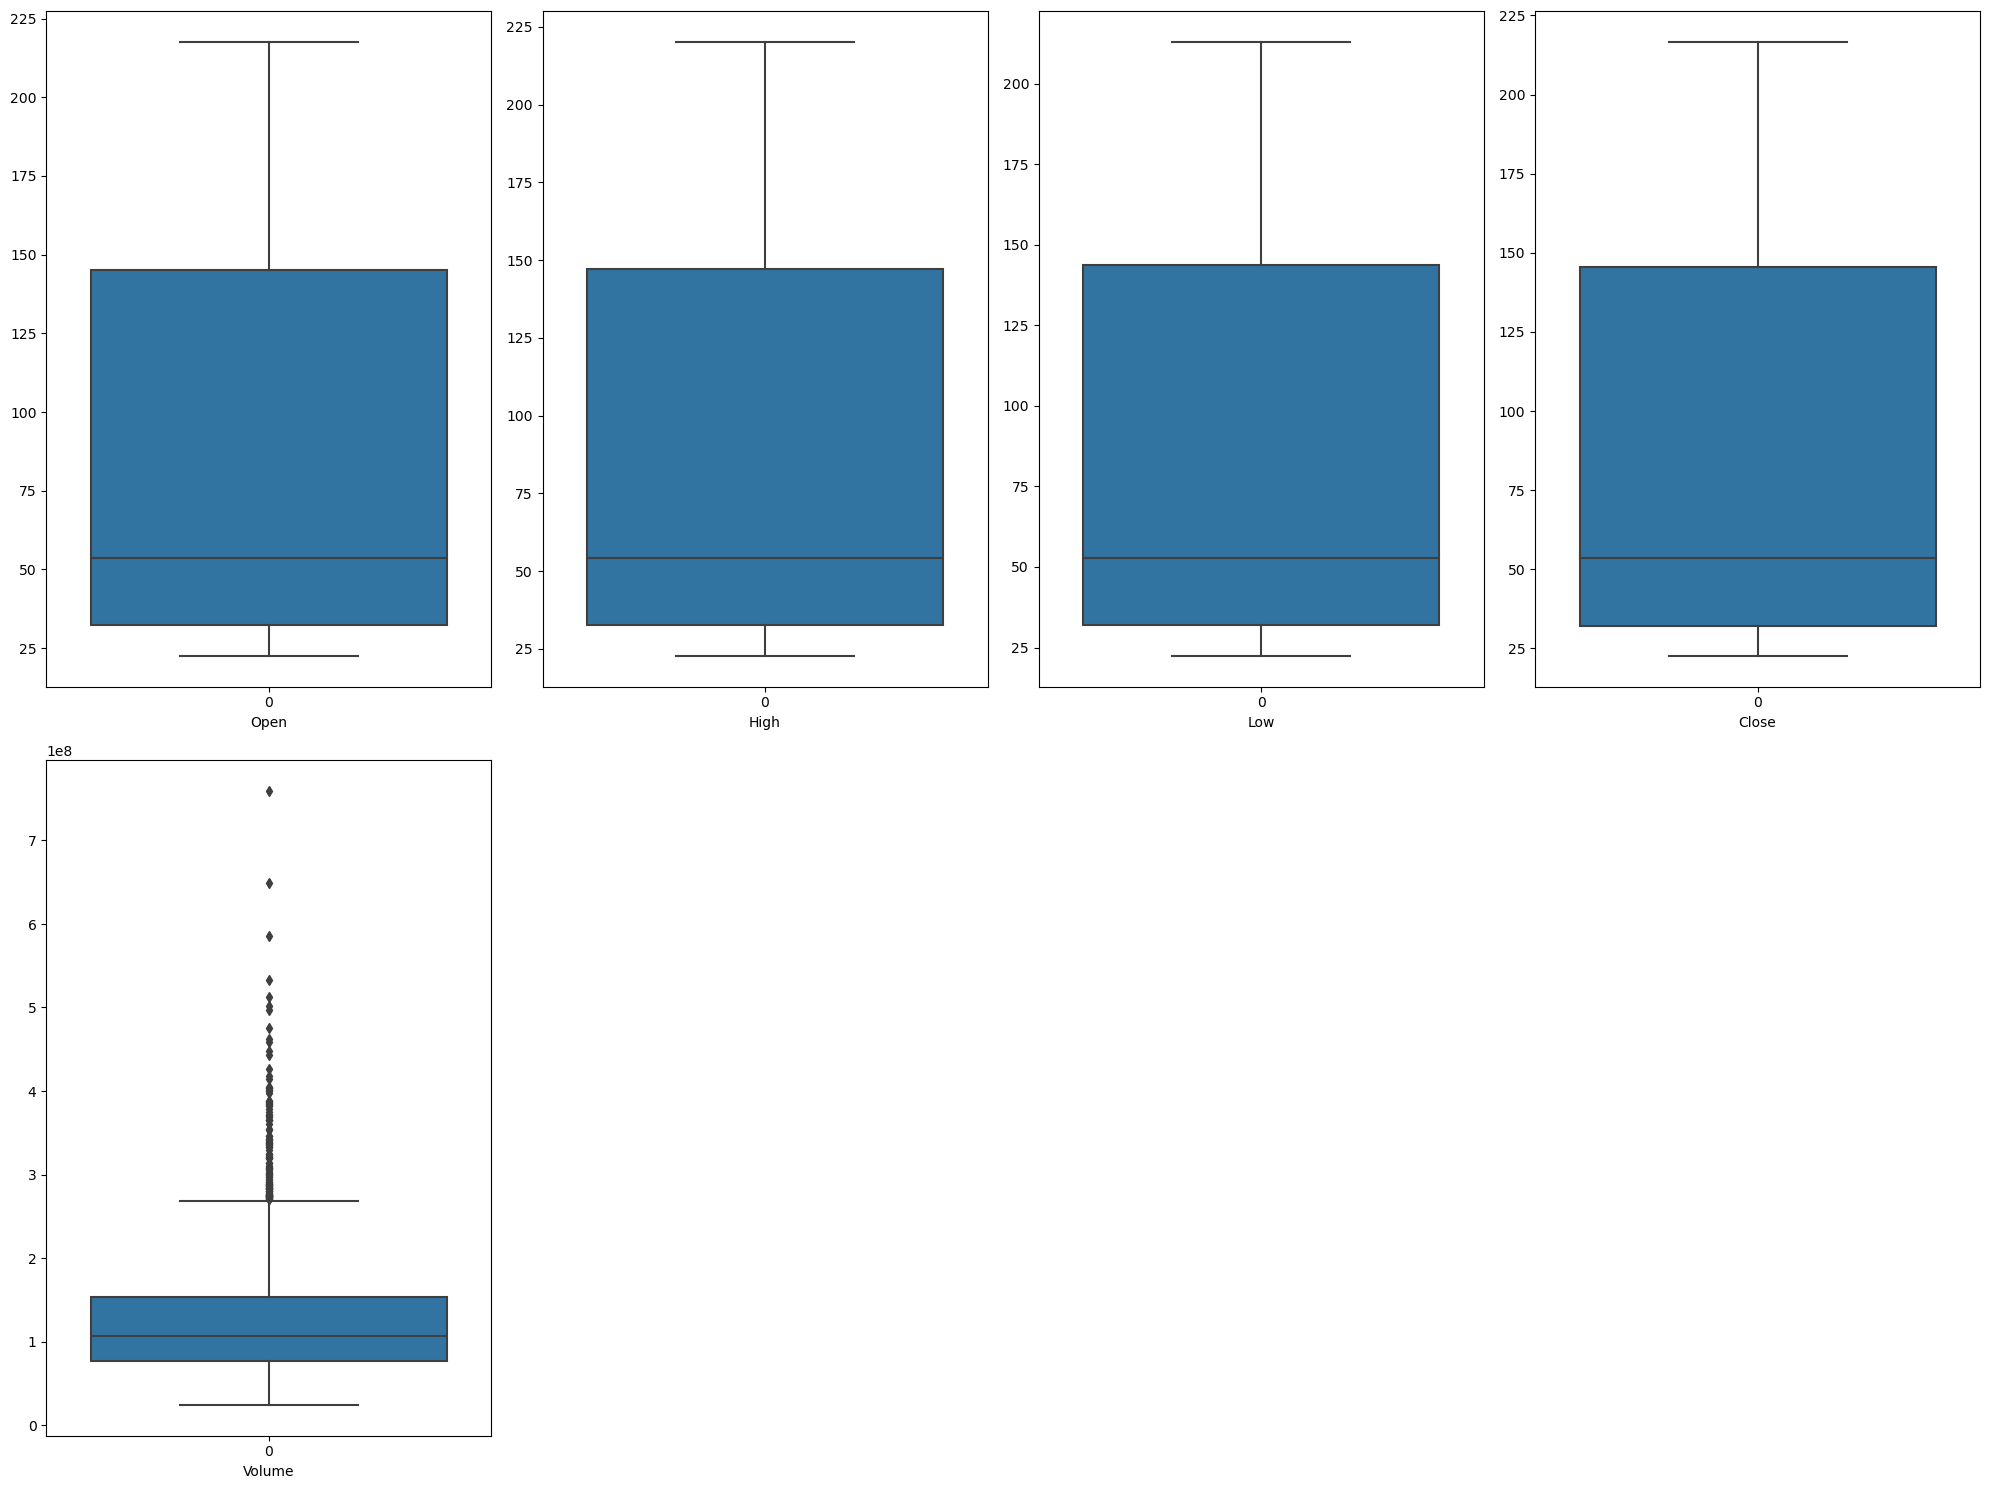

In [32]:
# Outlier 
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
    if plotnumber<=6:
        ax= plt.subplot(2,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

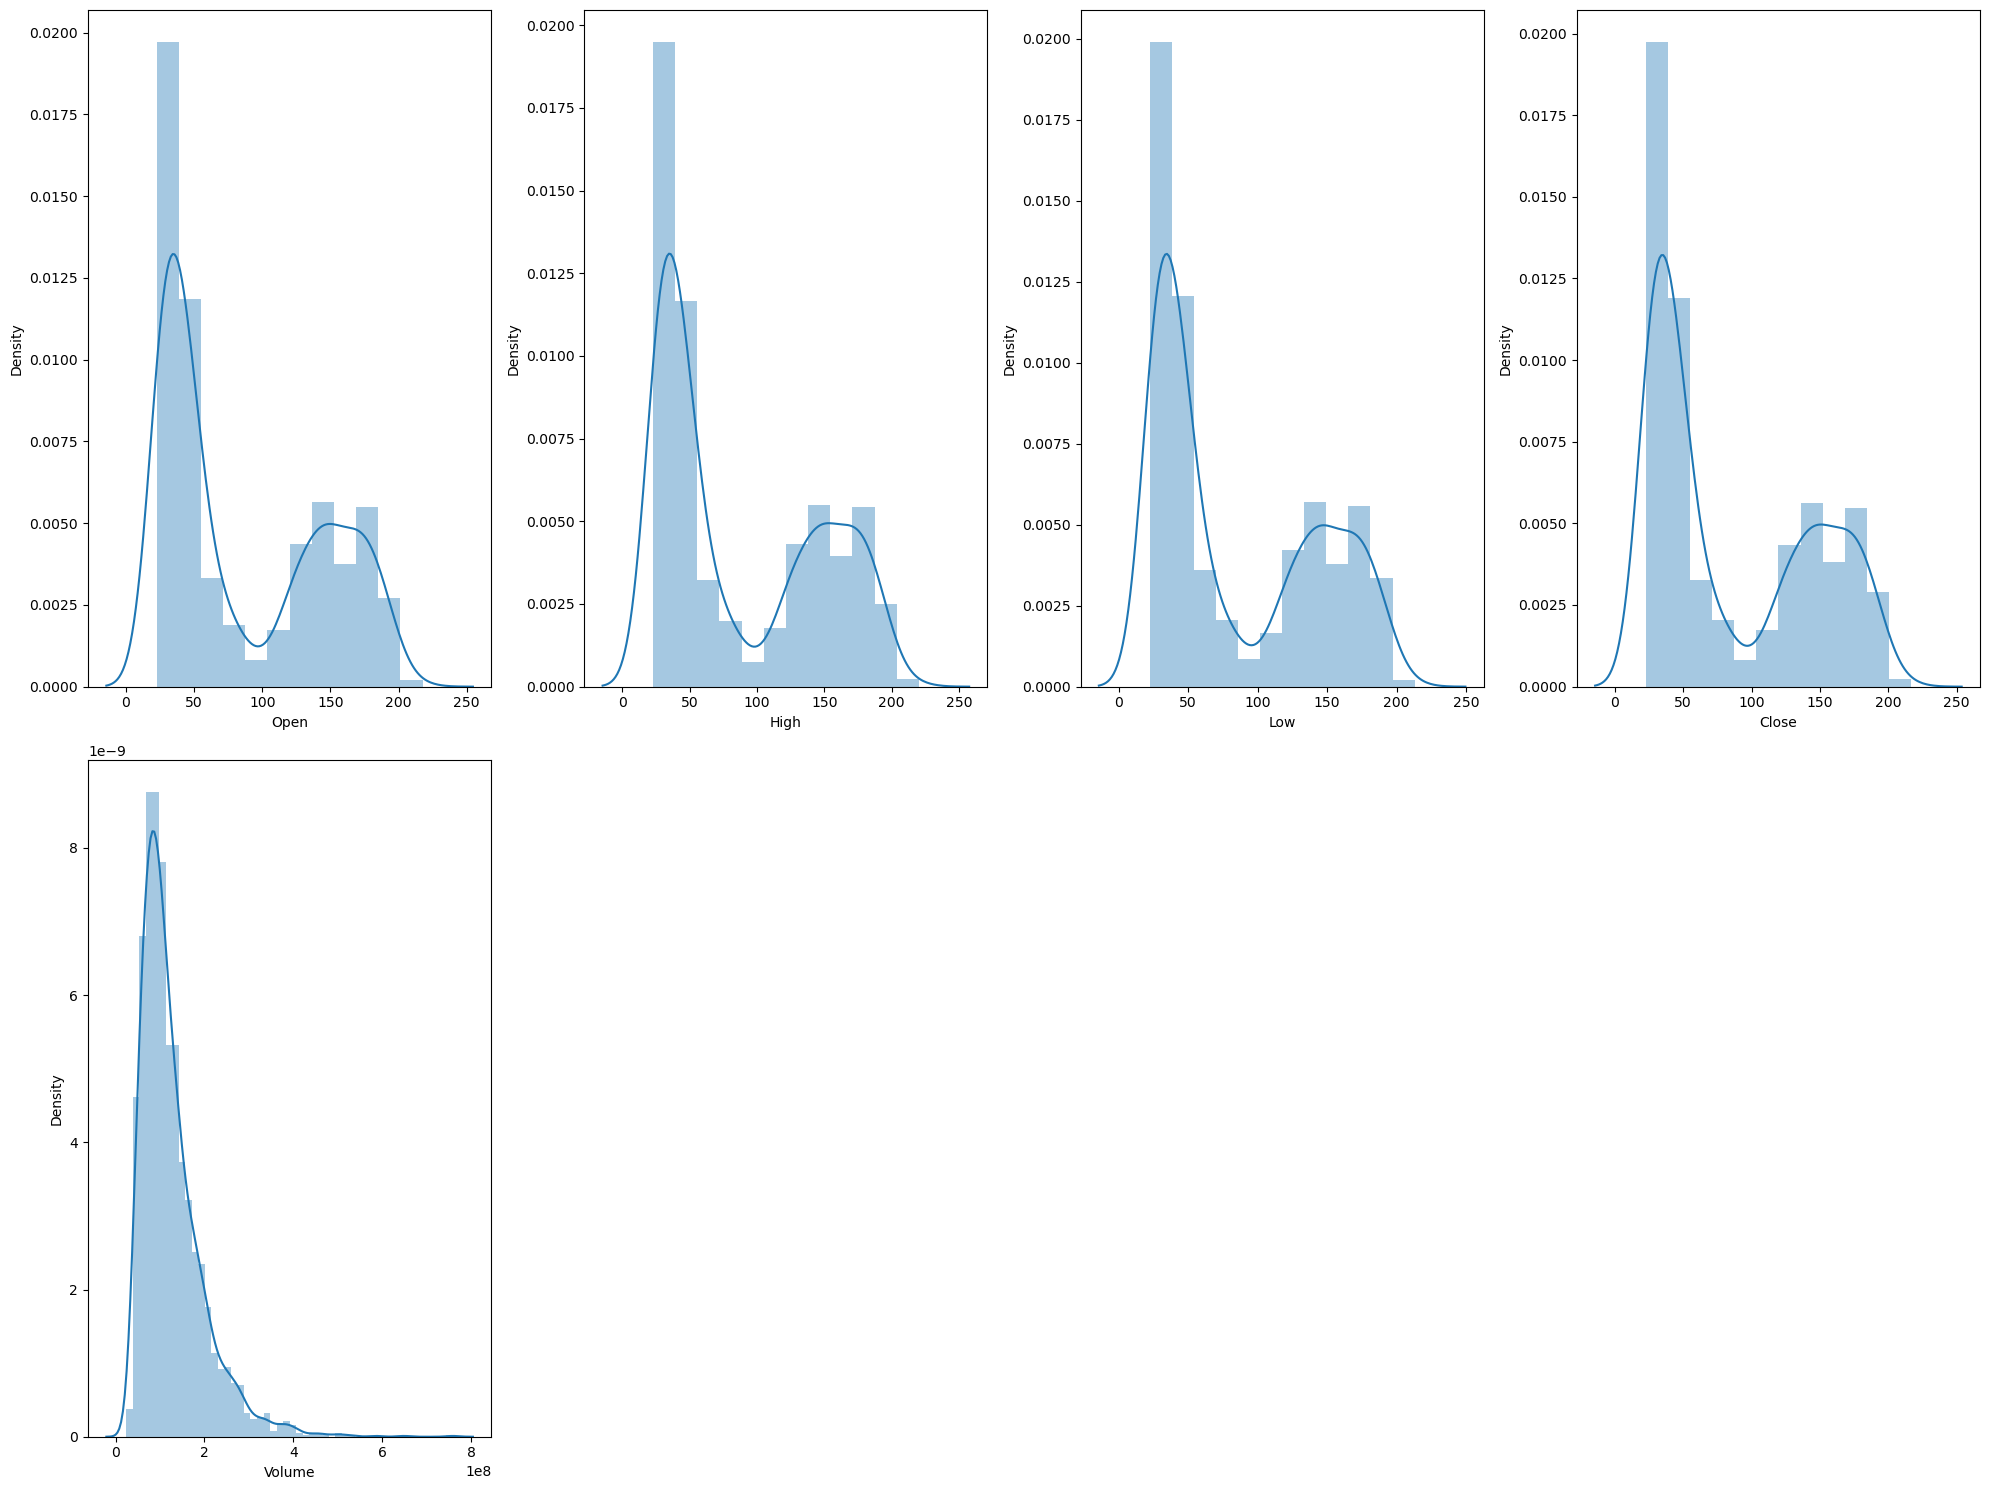

In [33]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
    if plotnumber<=6:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout()

In [34]:
df.skew()

Open      0.517212
High      0.512686
Low       0.522135
Close     0.516834
Volume    2.039564
dtype: float64

In [35]:
# for removing skewness use cuberoot method

df['Volume']= np.cbrt(df['Volume'])

In [36]:
df.skew()

Open      0.517212
High      0.512686
Low       0.522135
Close     0.516834
Volume    0.767158
dtype: float64

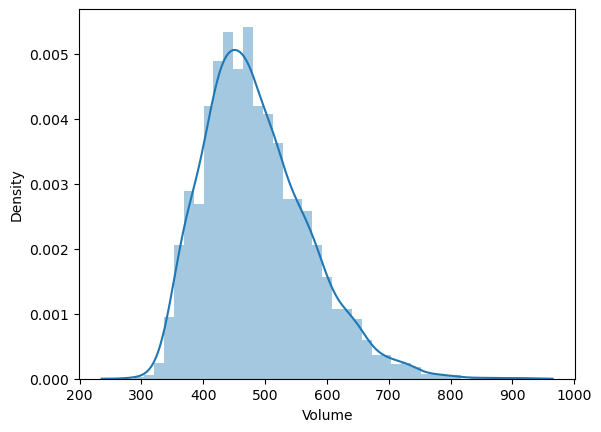

In [37]:
sns.distplot(df['Volume'])
plt.show()

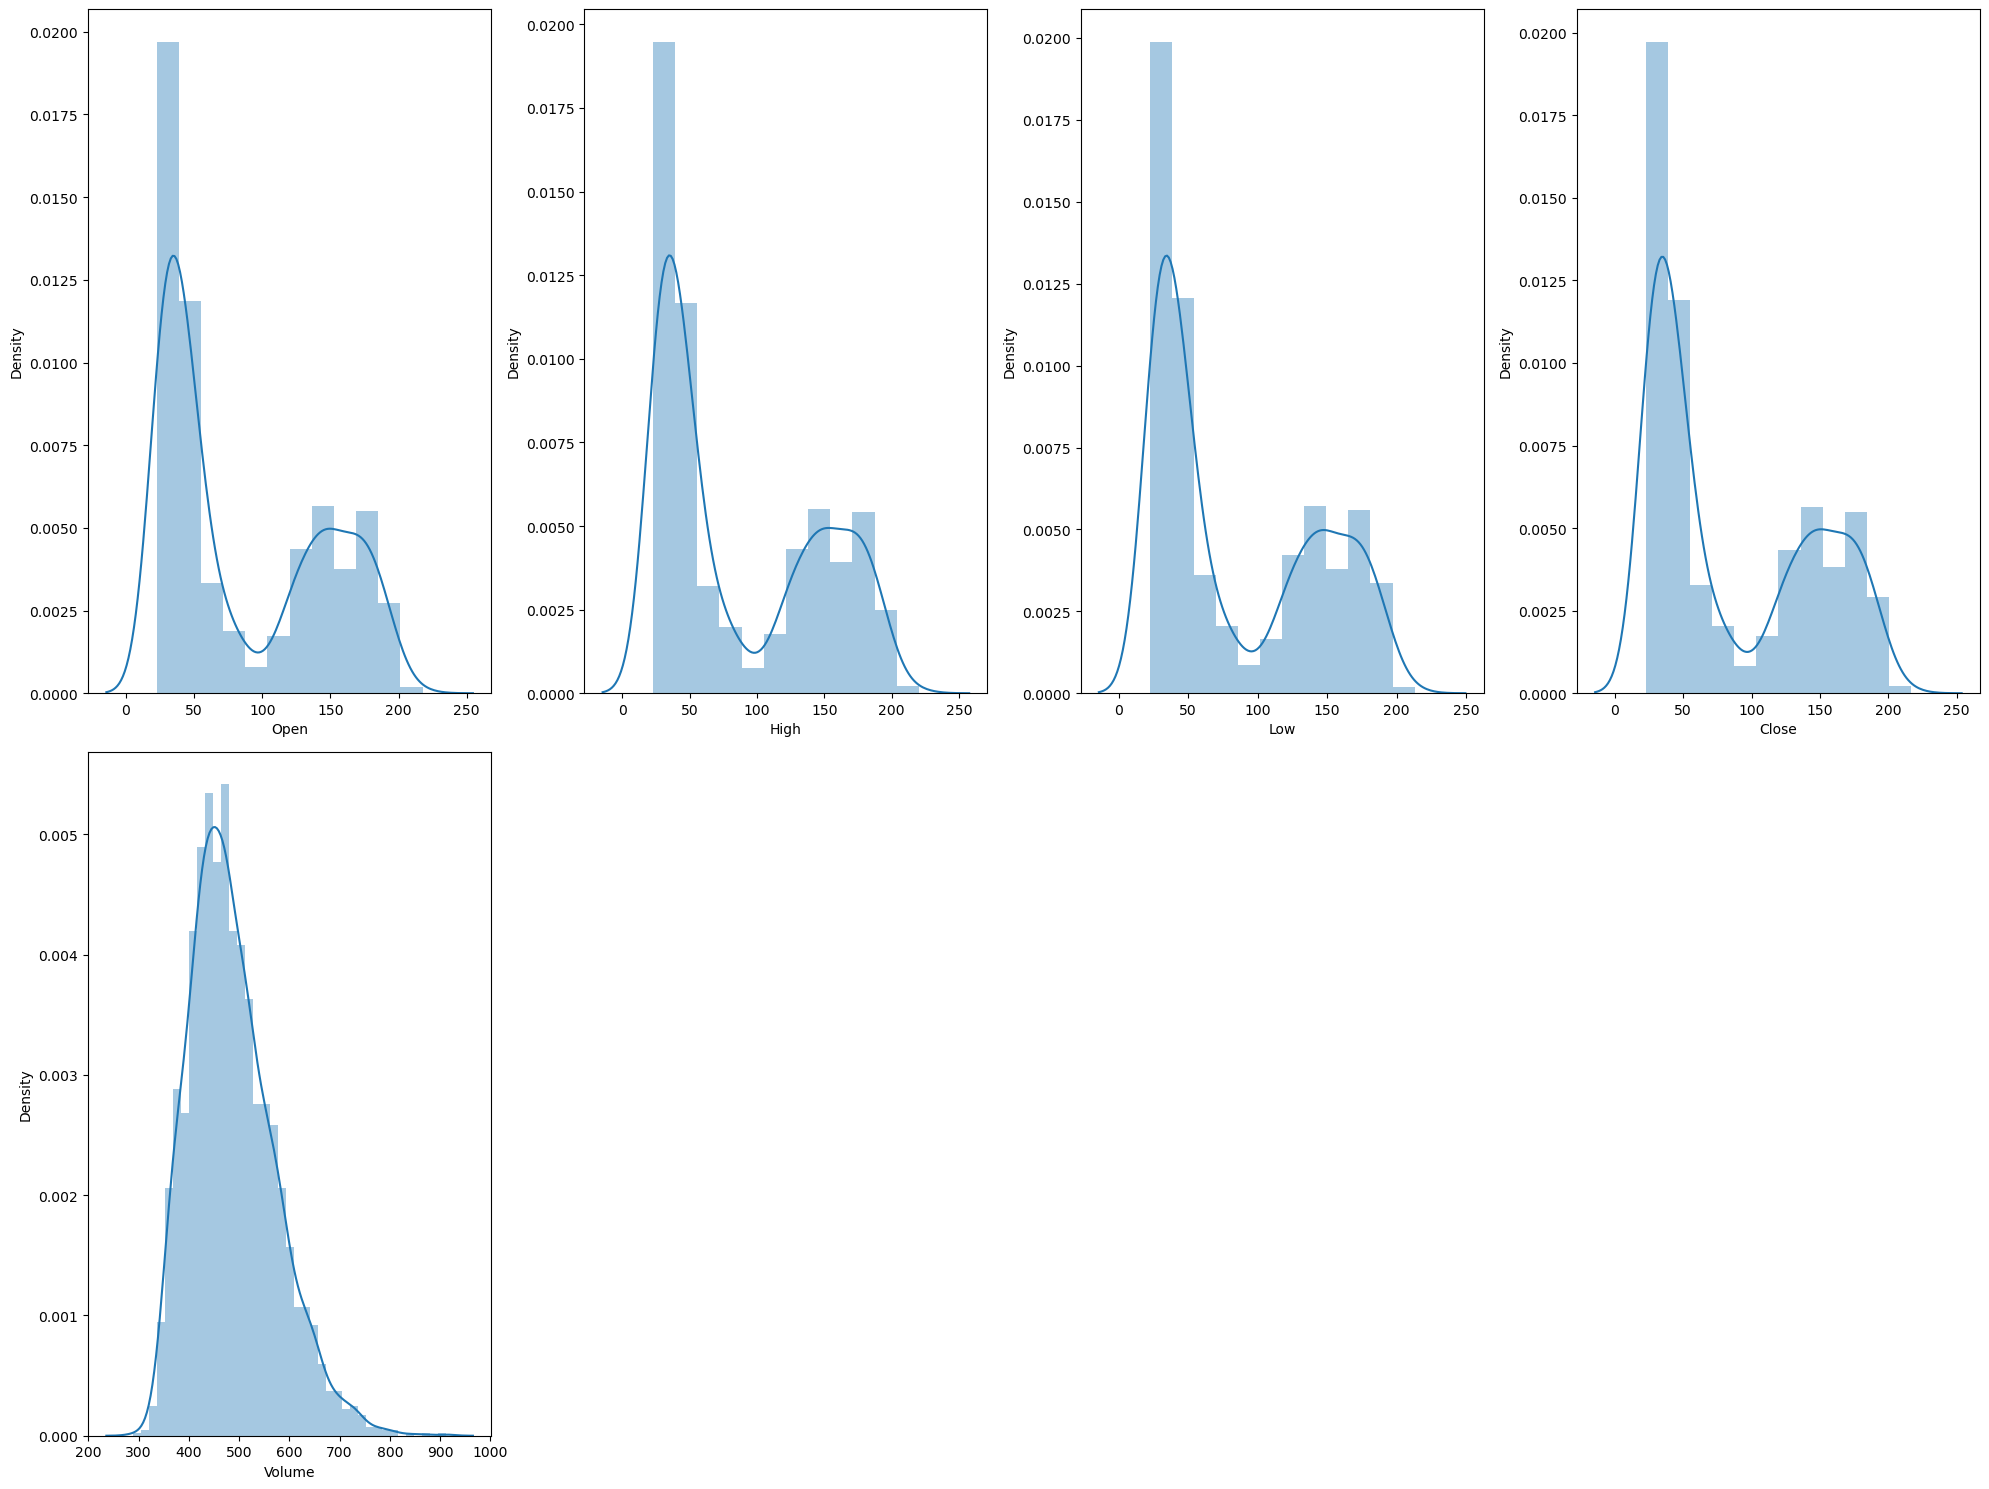

In [38]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
    if plotnumber<=6:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    
    plotnumber+=1
plt.tight_layout() 

In [39]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999859,0.999852,0.999679,-0.589213
High,0.999859,1.000000,0.999807,0.999850,-0.585534
Low,0.999852,0.999807,1.000000,0.999850,-0.593587
Close,0.999679,0.999850,0.999850,1.000000,-0.589781
Volume,-0.589213,-0.585534,-0.593587,-0.589781,1.000000


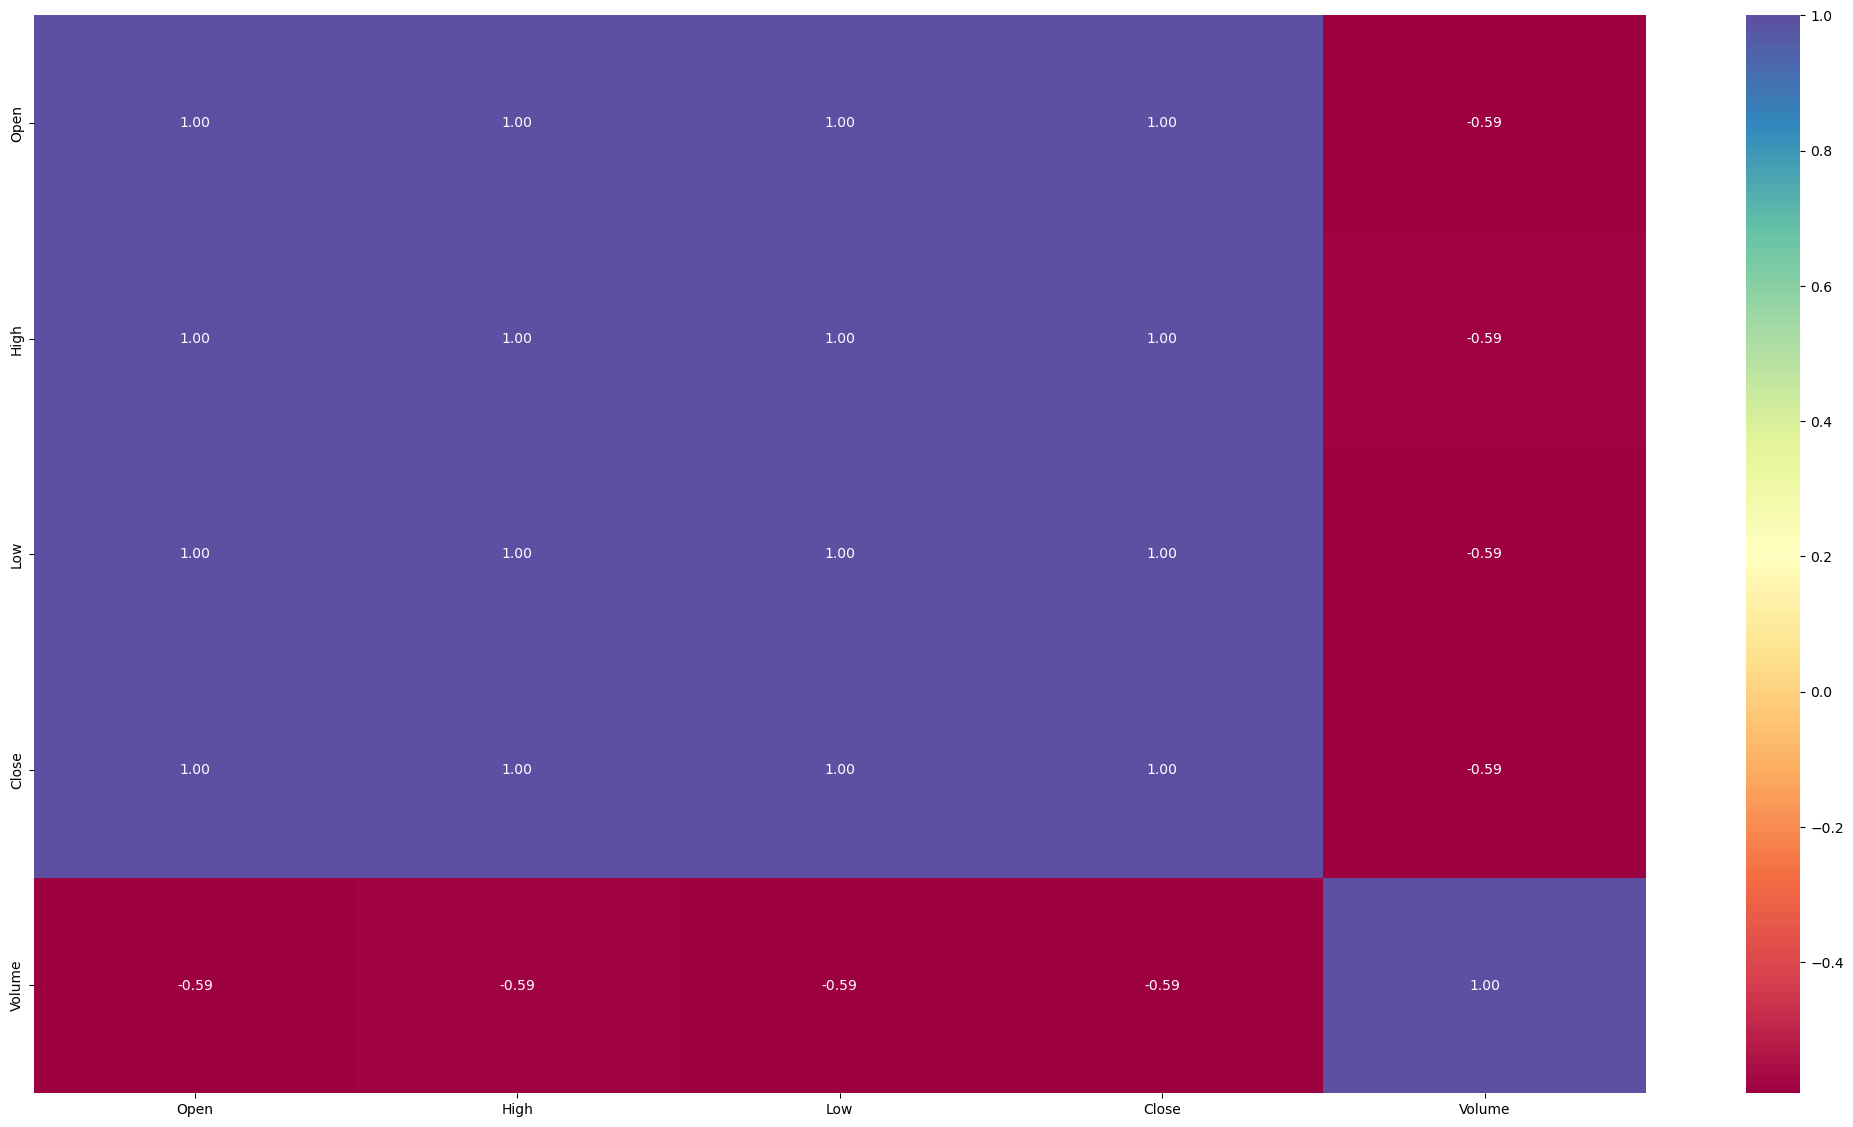

In [40]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',fmt='0.2f')
plt.show()

In [41]:
# Feature selection
X = df1.drop('Close',axis=1)
y = df1['Close']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Open,High,Low,Volume
0,-1.083451,-1.085077,-1.082123,0.455448
1,-1.082773,-1.083610,-1.081481,0.171443
2,-1.080866,-1.079629,-1.077330,2.274684
3,-1.075443,-1.072379,-1.071681,1.300314
4,-1.069428,-1.070955,-1.067230,0.546142
...,...,...,...,...
2467,2.150169,2.204882,2.175603,-0.444587
2468,2.221682,2.199518,2.180396,-0.675424
2469,2.159659,2.125933,2.109356,-0.571113
2470,2.099670,2.086542,2.079570,2.112343


# checking VIF 

In [43]:
# finding VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif ['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']= X.columns

vif

,VIF values,Features
0,5222.066140,Open
1,4671.986516,High
2,4557.877702,Low
3,1.771212,Volume


##  Finding best random state

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [45]:
# finding best random state 

maxAcc = 0
maxRS =0

for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maxm r2 score is",maxAcc,'random state ',maxRS)

Maxm r2 score is 0.9999026305264588 random state  139


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=maxRS)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR

In [48]:
# Linear Regression

lr = LinearRegression()
lr.fit(X_train,y_train)
predlr = lr.predict(X_test)
pred_train = lr.predict(X_train)
print(lr)
print('r2 score ',r2_score(y_test,predlr)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predlr))
print('mean squred error ',mean_squared_error(y_test,predlr))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predlr)))

LinearRegression()
r2 score  99.99026305264587
r2 score on training data  99.9866578569264
mean absolute eroor  0.37060742842524036
mean squred error  0.3354955885066662
root mean squred error  0.579219810181477


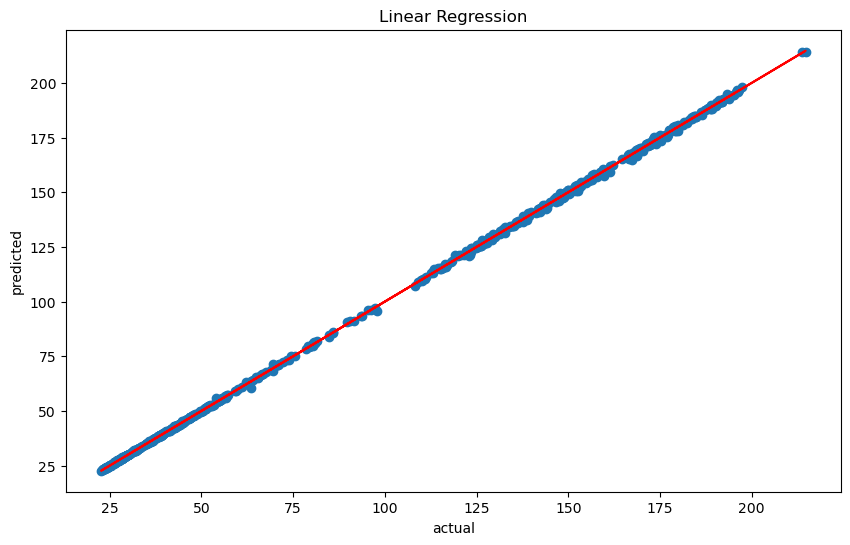

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(x=predlr,y=y_test)
plt.plot(predlr,predlr,color = 'r')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Linear Regression')
plt.show()

In [50]:
# RandomForestRegressor

rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)
predrfr = rfr.predict(X_test)
pred_train = rfr.predict(X_train)
print(rfr)
print('r2 score ',r2_score(y_test,predrfr)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predrfr))
print('mean squred error ',mean_squared_error(y_test,predrfr))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predrfr)))

RandomForestRegressor()
r2 score  99.98148655372627
r2 score on training data  99.99659952019256
mean absolute eroor  0.5169998193261455
mean squred error  0.6378980317956268
root mean squred error  0.7986851894179751


In [51]:
# KNN

knn = KNN()
knn.fit(X_train,y_train)
predknn = knn.predict(X_test)
pred_train = knn.predict(X_train)
print(knn)
print('r2 score ',r2_score(y_test,predknn)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predknn))
print('mean squred error ',mean_squared_error(y_test,predknn))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predknn))) 

KNeighborsRegressor()
r2 score  99.90147966819796
r2 score on training data  99.93826554626055
mean absolute eroor  1.1474735463611854
mean squred error  3.3946097781671747
root mean squred error  1.842446682584648


In [52]:
# Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
predlasso = lasso.predict(X_test)
pred_train = lasso.predict(X_train)
print(lasso)
print('r2 score ',r2_score(y_test,predlasso)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predlasso))
print('mean squred error ',mean_squared_error(y_test,predlasso))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predlasso)))

Lasso()
r2 score  99.93220373559166
r2 score on training data  99.92292288628327
mean absolute eroor  1.2035016644941279
mean squred error  2.335983424682707
root mean squred error  1.5283924315053077


In [53]:
# Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)
predridge = ridge.predict(X_test)
pred_train = ridge.predict(X_train)
print(ridge)
print('r2 score ',r2_score(y_test,predridge)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predridge))
print('mean squred error ',mean_squared_error(y_test,predridge))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predridge)))

Ridge()
r2 score  99.97936749478052
r2 score on training data  99.97429776512752
mean absolute eroor  0.5559796240771582
mean squred error  0.7109121811209139
root mean squred error  0.8431560834868678


In [54]:
# GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predgbr = gbr.predict(X_test)
pred_train = gbr.predict(X_train)
print(gbr)
print('r2 score ',r2_score(y_test,predgbr)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predgbr))
print('mean squred error ',mean_squared_error(y_test,predgbr))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predgbr)))

GradientBoostingRegressor()
r2 score  99.97655311427273
r2 score on training data  99.98866078128094
mean absolute eroor  0.5930844080135226
mean squred error  0.8078842823759939
root mean squred error  0.8988238327814821


In [55]:
# SVR

svr = SVR()
svr.fit(X_train,y_train)
predsvr = gbr.predict(X_test)
pred_train = gbr.predict(X_train)
print(svr)
print('r2 score ',r2_score(y_test,predsvr)*100)
print('r2 score on training data ',r2_score(y_train,pred_train)*100)
print('mean absolute eroor ',mean_absolute_error(y_test,predsvr))
print('mean squred error ',mean_squared_error(y_test,predsvr))
print('root mean squred error ',np.sqrt(mean_squared_error(y_test,predsvr)))

SVR()
r2 score  99.97655311427273
r2 score on training data  99.98866078128094
mean absolute eroor  0.5930844080135226
mean squred error  0.8078842823759939
root mean squred error  0.8988238327814821


In [56]:
# Cross validation 

from sklearn.model_selection import cross_val_score

In [57]:
# cv of linear regression

score = cross_val_score(lr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predlr)-score.mean())*100)

[0.99768438 0.99927835 0.99898727 0.99719023 0.99775149]
0.9981783431486642
difference between Accuracy score and cross validation score is  =  0.172428737779462


In [58]:
# cv of random forest regressor 

score = cross_val_score(rfr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predrfr)-score.mean())*100)

[0.97650408 0.99429925 0.57413029 0.94697408 0.84764688]
0.8679109162908072
difference between Accuracy score and cross validation score is  =  13.190394924645554


In [59]:
# cv of KNN

score = cross_val_score(knn,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predknn)-score.mean())*100)

[-0.49596828  0.88634466  0.37068618  0.84101143  0.80311035]
0.4810368673021116
difference between Accuracy score and cross validation score is  =  51.797792937986806


In [60]:
# cv of Lasso

score = cross_val_score(lasso,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predlasso)-score.mean())*100)

[0.78459346 0.97540397 0.99580813 0.9863854  0.96319914]
0.9410780201007409
difference between Accuracy score and cross validation score is  =  5.824401725517559


In [61]:
# cv of Ridge

score = cross_val_score(ridge,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predridge)-score.mean())*100)

[0.99574242 0.99878561 0.99855462 0.9944617  0.99486674]
0.9964822185784449
difference between Accuracy score and cross validation score is  =  0.3311456369360255


In [62]:
# cv of Gradiantboosting 

score = cross_val_score(gbr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predgbr)-score.mean())*100)

[0.9665327  0.99139451 0.56898838 0.96479491 0.8506958 ]
0.8684812606878044
difference between Accuracy score and cross validation score is  =  13.128427045492296


In [63]:
# cv of SVR

score = cross_val_score(svr,X,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("difference between Accuracy score and cross validation score is  = ",(r2_score(y_test,predsvr)-score.mean())*100)

[-16.83469862   0.85625739   0.97104716   0.86139174  -1.17776051]
-3.0647525679220555
difference between Accuracy score and cross validation score is  =  406.4518099064783


### Note :- whenever the diff betn the difference between Accuracy score and cross validation score is less between ridge and liner always choose ridge 

In [64]:
# Hyperparameter tunning

from sklearn.model_selection import GridSearchCV

In [65]:
param = {'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
        'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
        'positive':[False,True],
        'random_state':[1,4,10,20,25]
        
        }
gscv = GridSearchCV(Ridge(),param,cv=5)
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20, 25],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [66]:
gscv.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [67]:
model =Ridge(alpha=0.05,fit_intercept=True,positive=False,random_state=1,solver='auto')

In [68]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('R2 score :',r2_score(y_test,pred))
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('mean square error :',mean_squared_error(y_test,pred))
print('Root mean sq error :',np.sqrt(mean_squared_error(y_test,pred)))

R2 score : 0.9998951381711195
Mean absolute error : 0.392548351111523
mean square error : 0.3613111965449375
Root mean sq error : 0.6010916706667441


In [69]:
import pickle
file_name = 'Apple.pkl'
pickle.dump(model,open(file_name,'wb'))

In [70]:
load_model = pickle.load(open('Apple.pkl','rb'))
result = load_model.score(X_test,y_test)
print(result*100)

99.98951381711196


In [71]:
conclusion = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=["Predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,732,733,734,735,736,737,738,739,740,741
Predicted,195.342917,37.626355,33.647078,135.235865,28.495890,136.151581,37.515949,137.579184,188.518635,44.900931,...,48.254541,45.655651,179.335975,29.567778,54.598295,30.076054,84.829836,42.644914,142.315961,29.759477
original,194.500000,37.687500,33.755001,134.509995,28.422501,135.940002,37.500000,138.919998,187.869995,44.662498,...,48.365002,45.634998,178.179993,29.400000,54.582500,29.997499,84.699997,42.275002,142.649994,29.930000
